In [1]:
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister
import qiskit
from qiskit import Aer
from qiskit.visualization import plot_state_city, plot_histogram

from qutip_qip.qiskit import Provider

In [2]:
provider = Provider()

In [3]:
circ = QuantumCircuit(2,2)
circ.h(0)
circ.h(1)
circ.measure_all()

In [4]:
circ.draw()

┌───┐ ░ ┌─┐   
   q_0: ┤ H ├─░─┤M├───
        ├───┤ ░ └╥┘┌─┐
   q_1: ┤ H ├─░──╫─┤M├
        └───┘ ░  ║ └╥┘
   c: 2/═════════╬══╬═
                 ║  ║ 
meas: 2/═════════╩══╩═
                 0  1

In [5]:
# on qutip backend
backend = provider.get_backend("circuit_simulator")
job = backend.run(circ)
result = job.result()

In [6]:
result.data()

{'counts': {'0x0': 0.25, '0x1': 0.25, '0x2': 0.25, '0x3': 0.25},
 'statevector': Statevector([0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
             dims=(2, 2))}

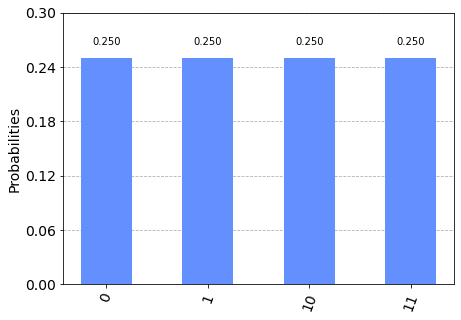

In [7]:
plot_histogram(result.get_counts())

In [8]:
# on qiskit backend

qiskit_backend = Aer.get_backend("statevector_simulator")
qiskit_job = qiskit_backend.run(circ, shots=100)
qiskit_result = qiskit_job.result()

In [9]:
qiskit_result.data()

{'counts': {'0xc': 21, '0x4': 25, '0x8': 29, '0x0': 25},
 'statevector': Statevector([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
             dims=(2, 2))}

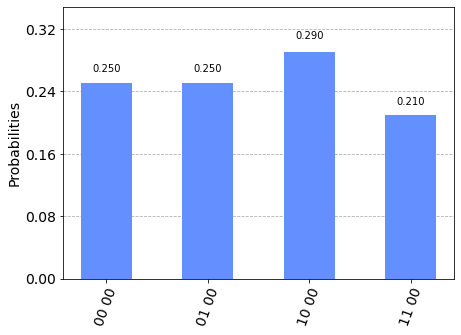

In [10]:
plot_histogram(qiskit_result.get_counts())